In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for clean plots
sns.set(style="whitegrid")
%matplotlib inline


In [4]:
# Load the CSV file
df = pd.read_csv("Mall_Customers.csv")

# Show first 5 rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Check data types and missing values
df.info()

# Check for null values
print("\nMissing values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicate rows: 0


In [6]:
# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Drop 'CustomerID' (not useful for clustering)
df.drop('CustomerID', axis=1, inplace=True)


In [7]:
from sklearn.preprocessing import StandardScaler

# Scale all numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert to DataFrame for easier use later
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()


ValueError: could not convert string to float: 'Male'

In [8]:
# Convert 'Gender' to numeric: Male → 0, Female → 1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Check to confirm
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [9]:
from sklearn.preprocessing import StandardScaler

# Scale the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Optional: turn into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [10]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Show how much variance is explained by each component
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.33690046 0.26230645]


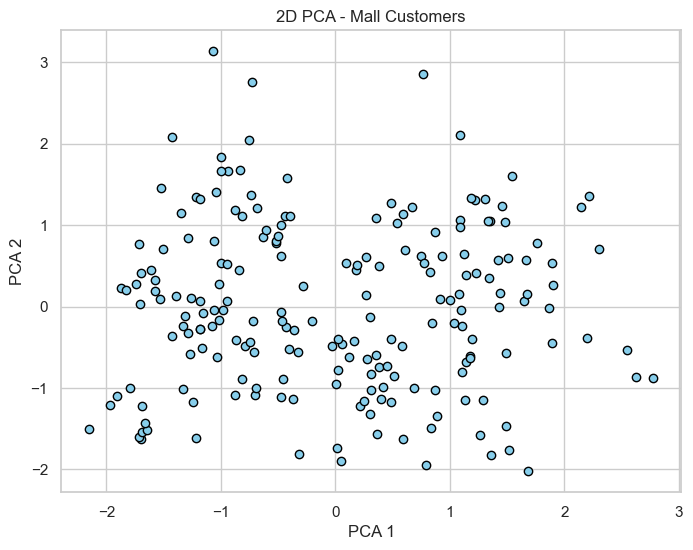

In [11]:
# Convert PCA results to DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(pca_df["PCA1"], pca_df["PCA2"], c="skyblue", edgecolor="black")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("2D PCA - Mall Customers")
plt.show()


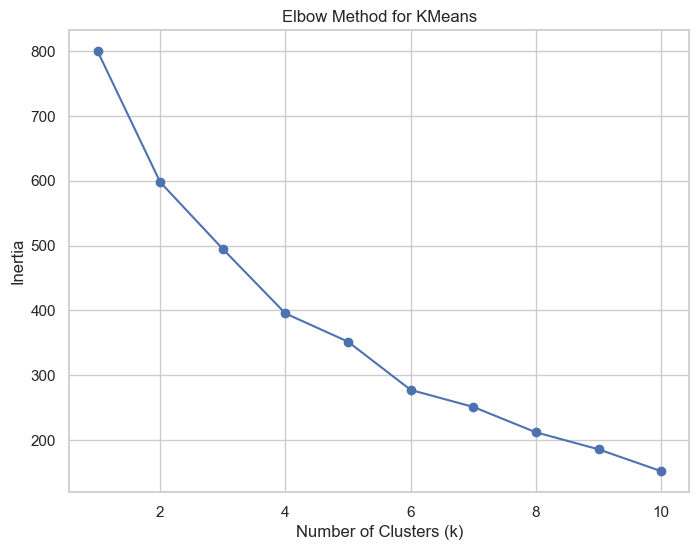

In [12]:
from sklearn.cluster import KMeans

# Try multiple k values to find the best one
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()


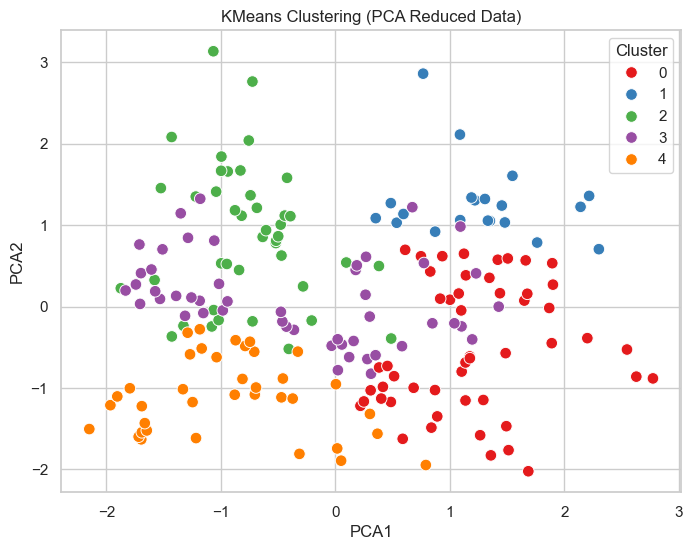

In [13]:
# Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Add to PCA DataFrame
pca_df["Cluster"] = kmeans_labels

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=pca_df, palette="Set1", s=70)
plt.title("KMeans Clustering (PCA Reduced Data)")
plt.show()


In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate KMeans
sil_score = silhouette_score(scaled_df, kmeans_labels)
db_index = davies_bouldin_score(scaled_df, kmeans_labels)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Index:", db_index)


Silhouette Score: 0.27191023466188324
Davies-Bouldin Index: 1.181091452406171
